In [1]:
import spacy

In [2]:
from collections import Counter
from string import punctuation

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
def extract_keywords(text, nlp, special_tags: list = None):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
        
    if special_tags:
        tags = [tag.lower() for tag in special_tags]
        for token in doc:
            if token.text in tags:
                result.append(token.text)
                
    for chunk in doc.noun_chunks:
        final_chunk = ""
        for token in chunk:
            if (token.pos_ in pos_tag):
                final_chunk =  final_chunk + token.text + " "
        if final_chunk:
            result.append(final_chunk.strip())
            
        for token in doc:
            if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
                continue
            if (token.pos_ in pos_tag):
                result.append(token.text)
        return list(set(result))
                
    #return result # 5

In [5]:
with open('/Users/harshithakonduru/Downloads/garzoni2020.txt') as f:
    contents = f.read()
    print(contents)

Fostering digital transformation of
SMEs: a four levels approach
Antonello Garzoni and Ivano De Turi
Department of Economics and Management, Universita LUM Jean Monnet,
Casamassima, Italy, and
Giustina Secundo and Pasquale Del Vecchio
Department of Innovation Engineering, University of Salento, Lecce, Italy
Abstract
Purpose – The purpose of this paper is to analyse how digital technologies trigger changes in the business
process of manufacturing small and medium-sized enterprises (SMEs) in the Apulia Region (South Italy). As
SMEs play an essential role in the process value creation of industries and countries, the article examines the
enablers of Industry 4.0 in a regional contexts characterized by delay in research and development and
innovation performances where the companies’ competitiveness is based on limited knowledge and
technological assets.
Design/methodology/approach – The case study of Smart District 4.0, an ongoing project aimed to
promote the digitalization of SMEs operat

In [6]:
output = extract_keywords(contents, nlp)
print(output)

['horizontal', 'gerring', 'grateful', 'debate', 'mn', 'consideration', 'productions', 'emergence', 'intelligent', 'mathematicians', 'trends', 'calls', 'sy', 'sufficient', 'facts', 'servitization', 'implications', 'role', 'consent', 'ios', 'mozilla', 'precision', 'general', 'iv', 'change', 'representation', 'proposal', 'producer', 'tc', 'relevant', 'magaletti', 'topic', 'importance', 'behaviour', 'new', 'final', 'distinct', 'leone', 'value', 'boundaries', 'assistance', 'rg', 'potentiality', 'year', 'national', 'openness', 'printing', 'al', 'account', 'transfer', 'ak', 'eu', 'technologies', 'authors', 'product', 'minimal', 'antonicelli', 'suitable', 'higher', 'goal', 'andneale', 'si', 'coherence', 'iterations', 'w', 'ideal', 'excellent', 'elements', 'feature', 'digitization', 'opportunities', 'stage', 'electronics', 'robotics', 'tradition', 'reduction', 'domains', 'result', 'fourth', 'typical', 'essential', 'delay', 'certain', 'ofmechanisms', 'regulation', 'em', 'insights', 'global', 'ga

In [24]:
type(output)

list

In [62]:
keyword_df = pd.DataFrame (output, columns = ['keywords'])
print (keyword_df)

          keywords
0       horizontal
1          gerring
2         grateful
3           debate
4               mn
...            ...
1190   embracement
1191         solve
1192  segmentation
1193           use
1194          iots

[1195 rows x 1 columns]


In [7]:
import math
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from owlready2 import *
import seaborn as sns


Bad key text.latex.unicode in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to 

In [12]:
def read_ontology(path):
    onto = get_ontology(path)
    onto.load()

    # Read classes
    classes = []

    for cl in onto.classes():
        classes.append(cl)

    classes = list(set(classes))

    '''# Read properties
    properties = []

    for prop in onto.properties():
        properties.append(prop)

    properties = list(set(properties))'''

    return classes

def get_mappings(filename):
    mappings = []

    with open(filename) as f:
        soup = BeautifulSoup(f, 'xml')

    cells = soup.find_all('Class')

    for cell in cells:
        entity1 = cell.get_attribute_list

        mappings.append(entity1)

    return mappings


def get_path(cl):
    path = cl.name
    while True:
        try:
            path = path + '/' + cl.is_a[0].name
        except IndexError:
            break
        cl = cl.is_a[0]
        if cl == 'owl.Thing':
          #the very first node
            break

    return '/'.join(path.split('/')[::-1])


def get_classes_df(ont_path):
    data = []

    # Parse ontologies
    classes1 = read_ontology(ont_path)

    # Generate classes
    for class_ in classes1:
        data.append((class_.name.lower(), 
                     get_path(class_).lower(),''.join(class_.label).lower(),''.join(class_.comment).lower()))
    dataset = pd.DataFrame(data, columns=['Name','Path','label','comment'])

    return dataset

In [13]:
get_classes_df('/Users/harshithakonduru/Downloads/I4.0_MM.owl')

,Name,Path,label,comment
0,artificial_intelligence,thing/technology/advance_it/artificial_intelli...,,
1,it_security,thing/technology/advance_it/it_security,,
2,advance_it,thing/technology/advance_it,,
3,strategy_for_i4.0,thing/organization_governance/strategy_for_i4.0,,
4,additive_manufacturing,thing/technology/advance_it/additive_manufactu...,,
5,ict_add-on_functionalities,thing/product/ict_add-on_functionalities,,
6,collaboration,thing/culture/collaboration,,
7,simulation_and_modelling,thing/technology/advance_it/simulation_and_mod...,,
8,product,thing/product,,
9,willingness_to_change,thing/culture/willingness_to_change,,


In [97]:
def iterative_levenshtein(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution

    Taken from python course example at: https://python-course.eu/applications-python/levenshtein-distance.php 
    """

    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution

    #for r in range(rows):
        #print(dist[r])
    
 
    return dist[row][col]


def struc_similarity_matrix(path1,keyword_df):
    df1_ = get_classes_df(path1)
    df2_ = keyword_df

    costs=(1,1,1)

    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values


    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))

    #Iterate and fill 
    for i in range(entity_list.shape[0]):
        u = entity_list2[i]
        for j in range(entity_list2.shape[0]):
            v = entity_list2[j]
          #similarity -> structural similarity 
            M_sim[i,j] = iterative_levenshtein(u,v,costs)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

def sim_plot(sim_df,threshold):
    plot_df = sim_df
    plot_df[plot_df<threshold]=0.0
    rows = sim_df.shape[0]
    cols = sim_df.shape[1]

    plt.figure(figsize=((0.4*rows),(0.4*cols)))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    cg = sns.heatmap(sim_df, fmt="g", cmap=cmap,linewidths=0.5, linecolor='black')


In [98]:
sim_df = struc_similarity_matrix('/Users/harshithakonduru/Downloads/I4.0_MM.owl',keyword_df)

In [99]:
sim_df

,horizontal,gerring,grateful,debate,mn,consideration,productions,emergence,intelligent,mathematicians,...,german,effective,field,critical,delays,embracement,solve,segmentation,use,iots
artificial_intelligence,0.0,8.0,8.0,9.0,9.0,10.0,10.0,9.0,10.0,12.0,...,8.0,10.0,9.0,6.0,10.0,10.0,9.0,10.0,10.0,7.0
it_security,8.0,0.0,7.0,6.0,6.0,10.0,9.0,6.0,8.0,11.0,...,3.0,7.0,7.0,7.0,6.0,9.0,7.0,9.0,7.0,7.0
advance_it,8.0,7.0,0.0,6.0,8.0,11.0,9.0,8.0,10.0,12.0,...,7.0,9.0,7.0,5.0,8.0,8.0,7.0,10.0,7.0,7.0
strategy_for_i4.0,9.0,6.0,6.0,0.0,6.0,9.0,10.0,7.0,9.0,11.0,...,5.0,7.0,6.0,8.0,3.0,8.0,5.0,9.0,5.0,5.0
additive_manufacturing,9.0,6.0,8.0,6.0,0.0,12.0,10.0,7.0,10.0,12.0,...,4.0,9.0,5.0,8.0,6.0,9.0,5.0,10.0,3.0,4.0
ict_add-on_functionalities,10.0,10.0,11.0,9.0,12.0,0.0,9.0,11.0,11.0,11.0,...,10.0,10.0,11.0,10.0,10.0,12.0,11.0,8.0,11.0,11.0
collaboration,10.0,9.0,9.0,10.0,10.0,9.0,0.0,11.0,10.0,10.0,...,10.0,8.0,10.0,8.0,9.0,9.0,10.0,9.0,10.0,8.0
simulation_and_modelling,9.0,6.0,8.0,7.0,7.0,11.0,11.0,0.0,8.0,12.0,...,6.0,7.0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,9.0
product,10.0,8.0,10.0,9.0,10.0,11.0,10.0,8.0,0.0,10.0,...,9.0,8.0,9.0,10.0,9.0,8.0,9.0,11.0,10.0,9.0
willingness_to_change,12.0,11.0,12.0,11.0,12.0,11.0,10.0,12.0,10.0,0.0,...,11.0,11.0,13.0,10.0,11.0,11.0,13.0,10.0,13.0,12.0


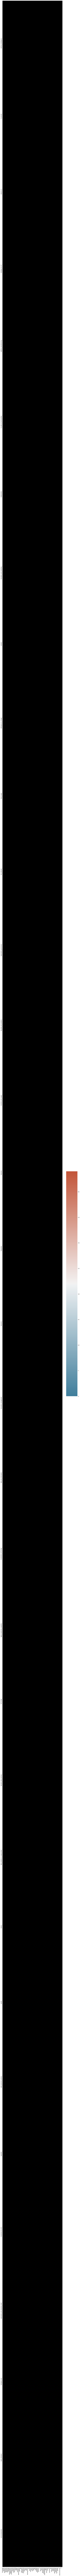

In [100]:
sim_plot(sim_df,0.5)